In [1]:
import src.extrae_letras_toolbox as etb
import src.predictions_toolbox as ptb
from keras.models import load_model
import pickle
from imutils import paths

print("Setup completado!")


Setup completado!


# Cargar Labels
*Groundtruth*, lo que queremos predecir: la letra a que corresponde cada imagen.

Ten en cuenta que divido cada `captcha` en cuatro imágenes que corresponden, más o menos, a las regiones que ocupa cada caracter individual.

In [2]:
labels_filename = "model_labels.dat"

with open(labels_filename, "rb") as f:
    labels = pickle.load(f)


# Cargar el modelo
Este es el modelo de Redes Neuronales que hemos entrenado previamente y que servirá para extraer el texto que se oculta en el `captcha`.

In [3]:
model_filename = "captcha_model.hdf5"

model = load_model(model_filename)


# Predicción
Usamos el modelo y las labels para extraer el texto que ocultan un conjunto `captcha` que he generado para test.

Podemos usar este script desde línea de comando para generar un conjunto de diez imágenes de prueba:
```
cd src
python3 genera_captchas_dataset.py -n 10 -d ../input/captchas_dataset/test_data/
```

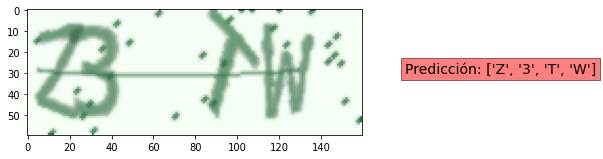

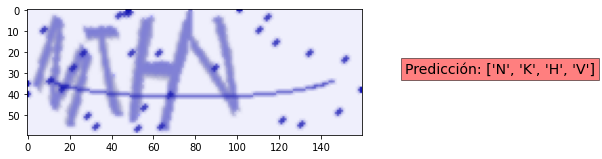

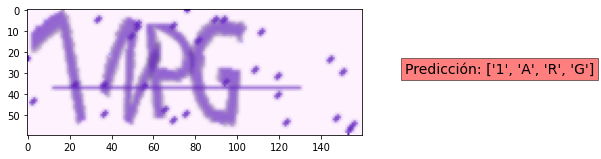

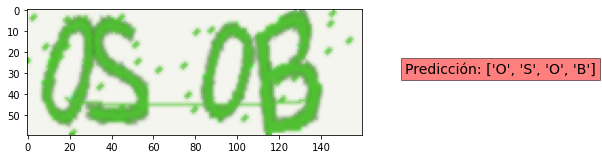

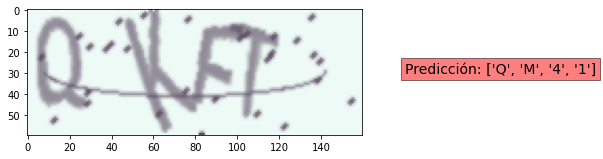

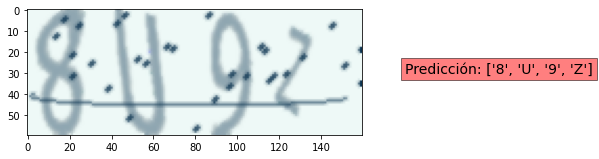

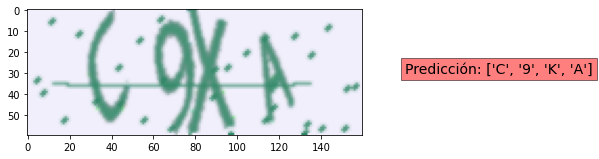

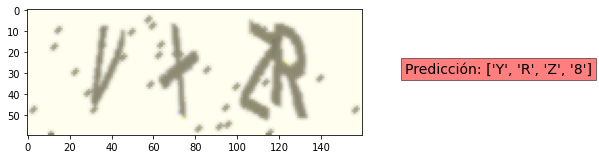

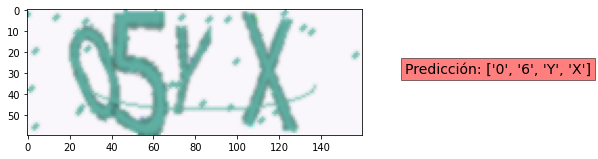

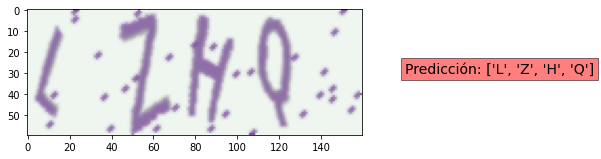

In [4]:
test_captchas_folder = "input/captchas_dataset/test_data/"

for image_file in paths.list_images(test_captchas_folder):
    captcha_image = etb.get_image(image_file)
    transformed_captcha_image = ptb.transform_captcha_image(captcha_image)
    contours = etb.get_contours(transformed_captcha_image)
    regions = etb.get_regions(contours)
    
    # Estamos tratando captchas de 4 letras.
    # Si recibimos menos de 4 regiones seguramente se han juntado varias letras en una sola región que hay que dividir.
    regions = etb.adjust_regions_by_number(regions, 4)
    
    captcha_text_predicted = ptb.predict(transformed_captcha_image, regions, model, labels)

    ptb.plot_individual_image(captcha_image, captcha_text_predicted)


# TO-DO:
- Hacer un heatmap.
- Comparar con un OCR (py Tesseract).
- Probar captchas generados con otro motor.